## NAUFALT ARKYANANTO // DATA SCIENCE // CAPSTONE MOUDUL 2 // PURWADHIKA BATAM
### PT.TRANSJAKARTA

## 1.1 PENDAHULUAN
Transjakarta adalah sistem transportasi Bus Rapid Transit (BRT) pertama di Asia Tenggara dan Selatan, yang beroperasi sejak tahun 2004 di Jakarta, Indonesia. TransJakarta dirancang sebagai moda transportasi massal pendukung aktivitas ibukota yang sangat padat. Dengan jalur lintasan terpanjang di dunia (251.2 km), serta memiliki 287 halte yang tersebar dalam 13 koridor, Transjakarta yang awalnya beroperasi mulai Pkl. 05.00 – Pkl. 22.00 WIB, kini beroperasi 24 jam.


### STAKEHOLDER
adapun stakeholder PT. Transportasi Jakarta adalah bapak Fadly Hasan merupakan Direktur Pelayanan dan Bisnis

## 1.2. PERTANYAAN
1. Apakah generasi kelompok usia bisa mempengaruhi seseorang dalam menggunakan jenis transportasi Transjakarta?
2. Pada waktu (jam) kapan saja, hari apa saja, koridor mana dan jenis busway Transjakarta apa yang memiliki jumlah penumpang yang sangat tinggi? 
3. Apakah jenis pembayaran transaksi bisa mempengaruhi seseorang dalam memilih jenis bus yang dipakai?


### TUJUAN
tujuan penulisan rumusan masalah diatas adalah untuk melihat seberapa efektifkah dari adanya pembagian jenis bus transjakarta terhadap minat penumpang dalam menggunakan bis tersebut?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# 2.1. IMPORT DATA SET
IMPORT DATA SET PADA DIBAWAH INI

In [2]:
data = pd.read_csv('D:\purwadhika\modul 2\capstone 2\Transjakarta.csv')
data

transID            payCardID payCardBank  \
0      EIIW227B8L34VB      180062659848800      emoney   
1      LGXO740D2N47GZ     4885331907664776         dki   
2      DJWR385V2U57TO     4996225095064169         dki   
3      JTUZ800U7C86EH         639099174703       flazz   
4      VMLO535V7F95NJ         570928206772       flazz   
...               ...                  ...         ...   
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi   
37896  YHHK837P6Y95GN     6502902290603767         dki   
37897  YXPP627N4G95HO      213159426675861      emoney   
37898  RGVK175U2U98UV      377840859133591      emoney   
37899  FMZZ963S4B68ZP         501862539795       flazz   

                  payCardName payCardSex  payCardBirthDate corridorID  \
0              Bajragin Usada          M              2008          5   
1                Gandi Widodo          F              1997         6C   
2               Emong Wastuti          F              1992        R1A   
3                Surya Wacana          F              1978        11D   
4             Embuh Mardhiyah          M              1982         12   
...                       ...        ...               ...        ...   
37895         Kamila Mahendra          F              2004         6B   
37896            Titi Siregar          M              1974         9N   
37897  drg. Zahra Nashiruddin          F              1976         1T   
37898            Ana Agustina          M              1976     JAK.13   
37899       drg. Leo Najmudin          F              1985         13   

                                   corridorName  direction tapInStops  ...  \
0                         Matraman Baru - Ancol        1.0     P00142  ...   
1      Stasiun Tebet - Karet via Patra Kuningan        0.0    B01963P  ...   
2                            Pantai Maju - Kota        0.0    B00499P  ...   
3           Pulo Gebang - Pulo Gadung 2 via PIK        0.0    B05587P  ...   
4                         Tanjung Priok - Pluit        0.0     P00239  ...   
...                                         ...        ...        ...  ...   
37895         Ragunan - MH Thamrin via Semanggi        1.0     P00261  ...   
37896                    Pinang Ranti - Pramuka        1.0     P00064  ...   
37897                      Cibubur - Balai Kota        1.0    B02873P  ...   
37898               Tanah Abang - Jembatan Lima        1.0    B02505P  ...   
37899                         Ciledug - Tendean        0.0     P00001  ...   

      tapInStopsLon  stopStartSeq            tapInTime  tapOutStops  \
0         106.84402             7  2023-04-03 05:21:44       P00253   
1         106.83302            13  2023-04-03 05:42:44      B03307P   
2         106.81435            38  2023-04-03 05:59:06      B04962P   
3         106.93526            23  2023-04-03 05:44:51      B03090P   
4         106.88900             5  2023-04-03 06:17:35       P00098   
...             ...           ...                  ...          ...   
37895     106.82309             2  2023-04-21 18:18:37       P00228   
37896     106.88116             1  2023-04-18 21:52:31       P00179   
37897     106.81676            12  2023-04-04 10:29:47      B00226P   
37898     106.80954            33  2023-04-15 19:59:26      B01787P   
37899     106.74786             2  2023-04-12 21:08:12       P00106   

             tapOutStopsName tapOutStopsLat tapOutStopsLon  stopEndSeq  \
0                    Tegalan      -6.203101      106.85715        12.0   
1        Sampoerna Strategic      -6.217152      106.81892        21.0   
2      Simpang Kunir Kemukus      -6.133731      106.81475        39.0   
3          Raya Penggilingan      -6.183068      106.93194        29.0   
4           Kali Besar Barat      -6.135355      106.81143        15.0   
...                      ...            ...            ...         ...   
37895                 SMK 57      -6.290967      106.82365        13.0   
37896           Pinang Ranti      -6.291075      106.88634

### PENEJELASAN KETERANGAN DALAM TABLE <br>


| NAMA KOLOM       	| KETERANGAN                                                                                                                                                                                   	|
|------------------	|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| transID          	| ID bus Transjakarta yang digunakan.                                                                                                                                                          	|
| payCardId        	| ID kartu pembayaran yang digunakan oleh penumpang.                                                                                                                                           	|
| payCardBank      	| Jenis kartu pembayaran yang digunakan oleh penumpang.(                                                                                                                                       	|
| payCardName      	| Nama yang tertera pada kartu pembayaran yang digunakan oleh penumpang.                                                                                                                       	|
| payCardSex       	| Jenis kelamin yang nama pemegang kartu pembayaran yang digunakan oleh penumpang                                                                                                              	|
| payCardBirthDate 	| Tahun kelahiran pemegang kartu pembayaran yang digunakan oleh penumpang. (segmentasi generasi)                                                                                               	|
| corridorId       	| ID koridor perjalanan yang diambil oleh penumpang.                                                                                                                                           	|
| corridorName     	| Nama koridor perjalanan yang diambil oleh penumpang.                                                                                                                                         	|
| direction        	| Arah berangkat (sesuai dengan nama koridor atau arah sebaliknya. 0 untuk arah berangkat dan 1 untuk arah sebaliknya).                                                                        	|
| tapInStops       	| Kode halte tempat penumpang menaiki bus.                                                                                                                                                     	|
| tapInStopName    	| Nama halte tempat penumpang menaiki bus.                                                                                                                                                     	|
| tapInStopsLat    	| Titik koordinat (garis lintang) lokasi halte tempat penumpang menaiki bus.                                                                                                                   	|
| tapInStopLon     	| Titik koordinat (garis bujur) lokasi halte tempat penumpang menaiki bus.                                                                                                                     	|
| StopStartsSeq    	| Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dst. Terkait dengan arah.                                                                                                  	|
| tapInTime        	| Waktu penumpang melakukan Tap-In di halte keberangkatan.                                                                                                                                     	|
| tapOutStops      	| Kode halte tempat penumpang turun dari bus.                                                                                                                                                  	|
| tapOutStopsName  	| Nama halte tempat penumpang turun dari bus.                                                                                                                                                  	|
| tapOutStopsLat   	| Titik koordinat (garis lintang) lokasi halte tempat penumpang turun dari bus.                                                                                                                	|
| tapOutStopsLon   	| Titik koordinat (garis bujur) lokasi halte tempat penumpang turun dari bus.                                                                                                                  	|
| StopEndSeq       	| Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dst. Terkait dengan arah.                                                                                                  	|
| tapOutTime       	| Waktu penumpang melakukan Tap-Out di halte tujuan.                                                                                                                                           	|
| payAmount        	| Jumlah biaya yang dikeluarkan oleh penumpang Transjakarta.(segmentasi produk perbankan yan dibayarkan )(20.000 merupakan premium transjakarta, 3.500 tarif normal, 0 angkot kartu jaklingko) 	|

### MELIHAT `UNIQUE VALUE` DALAM DATA BUS TRANSJAKARTA
yang berfungsi untuk melihat kesimpulan dari isi dalam dataset secara menyeluruh

In [3]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in data.columns :
    listItem.append( [col, data[col].nunique(), data[col].unique()])

tableunique = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tableunique

Column Name  Number of Unique  \
0   transID           37900              
1   payCardID         2000               
2   payCardBank       6                  
3   payCardName       1993               
4   payCardSex        2                  
5   payCardBirthDate  67                 
6   corridorID        221                
7   corridorName      216                
8   direction         2                  
9   tapInStops        2570               
10  tapInStopsName    2602               
11  tapInStopsLat     2587               
12  tapInStopsLon     2458               
13  stopStartSeq      67                 
14  tapInTime         37079              
15  tapOutStops       2230               
16  tapOutStopsName   2248               
17  tapOutStopsLat    2237               
18  tapOutStopsLon    2139               
19  stopEndSeq        74                 
20  tapOutTime        35908              
21  payAmount         3                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Unique Sample  
0   [EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SB

### COPY DATA SET 
Method copy() berguna untuk mengcopy series atau dataframe menjadi object yang terpisah dari object sebelumnya.

In [4]:
df = data.copy()

### MEMBUAT SEMUA KOLOM MENJADI "LOWERCASE"
FUNGSINYA ADALAH UNTUK MEMPERMUDAH DALAM MELAKUKAN PEMANGGILAN NAMA KOLOM

In [5]:
df.columns = map(str.lower, df.columns)


##  2.2. DATA UNDERSTANDING <br>
MELIHAT DATA YANG BERNILAI "NULL"
funsinya adalah untuk melihat data set disetiap kolom apakah ada data yang bernilai kosong dan juga melihat jenis datanya apakh "object", "integer", dll

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transid           37900 non-null  object 
 1   paycardid         37900 non-null  int64  
 2   paycardbank       37900 non-null  object 
 3   paycardname       37900 non-null  object 
 4   paycardsex        37900 non-null  object 
 5   paycardbirthdate  37900 non-null  int64  
 6   corridorid        36643 non-null  object 
 7   corridorname      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapinstops        36687 non-null  object 
 10  tapinstopsname    37900 non-null  object 
 11  tapinstopslat     37900 non-null  float64
 12  tapinstopslon     37900 non-null  float64
 13  stopstartseq      37900 non-null  int64  
 14  tapintime         37900 non-null  object 
 15  tapoutstops       35611 non-null  object 
 16  tapoutstopsname   36556 non-null  object

melihat data deskriptif dalam data frame dari data Transjakarta dengan melihat .describe()

In [7]:
df.describe()

paycardid  paycardbirthdate     direction  tapinstopslat  \
count  3.790000e+04  37900.000000      37900.000000  37900.000000    
mean   4.250060e+17  1990.089314       0.500633     -6.214838        
std    1.321699e+18  13.051482         0.500006      0.057911        
min    6.040368e+10  1946.000000       0.000000     -6.394973        
25%    1.800442e+14  1982.000000       0.000000     -6.245863        
50%    3.507947e+15  1990.000000       1.000000     -6.214587        
75%    4.699023e+15  2001.000000       1.000000     -6.175528        
max    4.997694e+18  2012.000000       1.000000     -6.089429        

       tapinstopslon  stopstartseq  tapoutstopslat  tapoutstopslon  \
count  37900.000000   37900.000000  36556.000000    36556.000000     
mean   106.841554     13.572480    -6.214651        106.841233       
std    0.060369       12.237623     0.059022        0.060999         
min    106.614730     0.000000     -6.394973        106.614730       
25%    106.803470     4.000000     -6.247225        106.801750       
50%    106.834830     10.000000    -6.214718        106.834580       
75%    106.882270     19.000000    -6.174736        106.883030       
max    107.023950     68.000000    -6.091746        107.023660       

         stopendseq     payamount  
count  36556.000000  36893.000000  
mean   21.219909     2699.712683   
std    13.800689     4212.225592   
min    1.000000      0.000000      
25%    11.000000     0.000000      
50%    18.000000     3500.000000   
75%    29.000000     3500.000000   
max    77.000000     20000.000000

In [8]:
df.describe(include='object')

transid paycardbank         paycardname paycardsex corridorid  \
count   37900           37900       37900               37900      36643       
unique  37900           6           1993                2          221         
top     EIIW227B8L34VB  dki         Fathonah Saefullah  F          1T          
freq    1               18743       80                  20157      400         

                corridorname tapinstops tapinstopsname            tapintime  \
count   35970                 36687      37900          37900                 
unique  216                   2570       2602           37079                 
top     Cibubur - Balai Kota  P00170     Penjaringan    2023-04-25 06:23:00   
freq    391                   236        243            3                     

       tapoutstops tapoutstopsname           tapouttime  
count   35611       36556           36556                
unique  2230        2248            35908                
top     P00016      BKN             2023-04-10 19:10:15  
freq    306         316             3

#### melihat visualisasi nilai persebaran data yang kosong dengan menggunakan library "SeaBorn" HeatMaps

<Axes: >

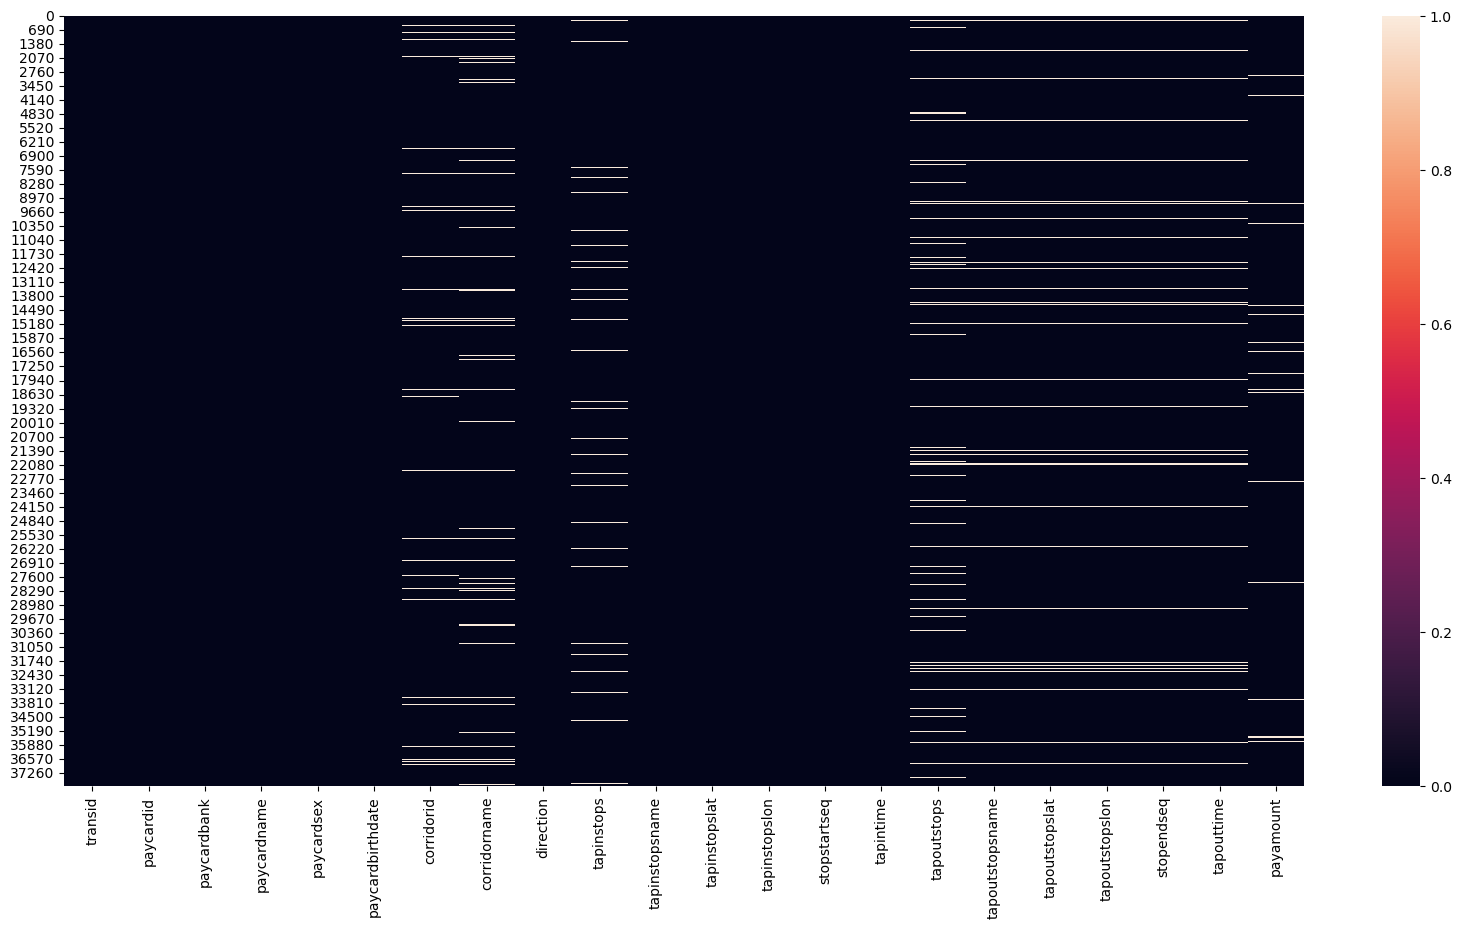

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df[['transid', 'paycardid', 'paycardbank', 'paycardname', 'paycardsex', 'paycardbirthdate', 'corridorid', 'corridorname', 'direction', 'tapinstops', 'tapinstopsname', 'tapinstopslat', 'tapinstopslon', 'stopstartseq', 'tapintime', 'tapoutstops', 'tapoutstopsname', 'tapoutstopslat', 'tapoutstopslon', 'stopendseq', 'tapouttime', 'payamount']].isna())

#### melihat persebaran data yang memiliki nilai null dalam bentuk '%'

In [10]:
persenan = df.isna().sum()/df.shape[0]*100
print (persenan.round(2))

transid             0.00
paycardid           0.00
paycardbank         0.00
paycardname         0.00
paycardsex          0.00
paycardbirthdate    0.00
corridorid          3.32
corridorname        5.09
direction           0.00
tapinstops          3.20
tapinstopsname      0.00
tapinstopslat       0.00
tapinstopslon       0.00
stopstartseq        0.00
tapintime           0.00
tapoutstops         6.04
tapoutstopsname     3.55
tapoutstopslat      3.55
tapoutstopslon      3.55
stopendseq          3.55
tapouttime          3.55
payamount           2.66
dtype: float64


hasil dari penjumlahan diata menunjukan bahwa ada sekitar 10 kolom yang meliliki nilai data null dibawah 10% adapun kolom yang memiliki nilai null sebagai berikut :
`corridorid`= 3.32%.
`corridorname`= 5.09%,
`tapinstops` = 3.2% 
`tapoutstops` = 6.04%
`tapoutstopname` = 3.55%
`tapoutstopslat ` = 3.55%
`tapoutstopslon` = 3.55%
`stopendseq` = 3.55%
`tapouttime`= 3.55%
`payamount` = 2.66%
seperti kita ketahui bahwasanya data diatas menunjukan  nilai null pada kolom-kolom tersebut *dibawah 10%* yang mana cara untuk mengatasi nilai null tersebut bisa dilakukan dengan menghapus baris yang memiliki nilai null. <br>
kemudian nilai null pada kolom `tapoutstopsname`, `tapoutstopslat`, `tapoutstopslon`, `stopendseq`, `tapouttime`, dan `payamount` memiliki beberapa sebaran data null yang berterkaitan dengan kolom `tapoutstops`.

melihat persebaran data null untuk melakukan cleaning data <br>
sebelum melakukan data cleaning pada kolom `payamount` kami akan melihat kolom `corridorname` yang mana kolom tersebut memiliki hubungan dengan kolom `payamount`

### mencari data null pada kolom `payamount`

In [11]:
df[df['payamount'].isnull()]
df.head(2)

transid         paycardid paycardbank     paycardname paycardsex  \
0  EIIW227B8L34VB  180062659848800   emoney      Bajragin Usada  M           
1  LGXO740D2N47GZ  4885331907664776  dki         Gandi Widodo    F           

   paycardbirthdate corridorid                              corridorname  \
0  2008              5          Matraman Baru - Ancol                      
1  1997              6C         Stasiun Tebet - Karet via Patra Kuningan   

   direction tapinstops  ... tapinstopslon  stopstartseq            tapintime  \
0  1.0        P00142     ...  106.84402     7             2023-04-03 05:21:44   
1  0.0        B01963P    ...  106.83302     13            2023-04-03 05:42:44   

   tapoutstops      tapoutstopsname tapoutstopslat tapoutstopslon  stopendseq  \
0  P00253       Tegalan             -6.203101       106.85715      12.0         
1  B03307P      Sampoerna Strategic -6.217152       106.81892      21.0         

            tapouttime  payamount  
0  2023-04-03 06:00:53  3500.0     
1  2023-04-03 06:40:01  3500.0     

[2 rows x 22 columns]

In [12]:
cc= df[df['corridorname'].str.contains('BKN - Blok M', na = False)] 
cc.head(2)

transid        paycardid paycardbank            paycardname  \
11   IIEK980X1O23NZ  347204308990092  emoney      R.M. Labuh Laksmiwati   
169  IWEH403G6J82OS  30428250357040   bni         Estiawan Hastuti        

    paycardsex  paycardbirthdate corridorid  corridorname  direction  \
11   F          1984              M7B        BKN - Blok M  1.0         
169  M          2008              M7B        BKN - Blok M  1.0         

    tapinstops  ... tapinstopslon  stopstartseq            tapintime  \
11   P00254     ...  106.83102     12            2023-04-03 06:22:10   
169  B02114P    ...  106.81421     6             2023-04-03 05:20:08   

     tapoutstops   tapoutstopsname tapoutstopslat tapoutstopslon  stopendseq  \
11   P00129       Mampang Prapatan -6.242699       106.82572      14.0         
169  B00290P      Dammara          -6.254190       106.83146      18.0         

              tapouttime  payamount  
11   2023-04-03 06:50:21 NaN         
169  2023-04-03 06:08:02 NaN         

[2 rows x 22 columns]

jadi nilai null pada kolom `'payamount'` diatas memiliki ketergantungan juga pada value di kolom `corridorname`. sehingga data null pada kolom `'payamount'` dan `corridorname` tersebut akan dihapus. 

## MENGHAPUS DATA YANG MEMILIKI NILAI NULL


In [13]:
df.dropna(inplace=True)

In [14]:
aa = df[df['payamount'].isnull()]
aa.head(2)

Empty DataFrame
Columns: [transid, paycardid, paycardbank, paycardname, paycardsex, paycardbirthdate, corridorid, corridorname, direction, tapinstops, tapinstopsname, tapinstopslat, tapinstopslon, stopstartseq, tapintime, tapoutstops, tapoutstopsname, tapoutstopslat, tapoutstopslon, stopendseq, tapouttime, payamount]
Index: []

[0 rows x 22 columns]

melihat persebaran data yang memiliki nilai ganda

In [15]:
duplicate = df.duplicated().sum()
print(f'untuk data duplikat sebanyak:', duplicate, 'baris')

untuk data duplikat sebanyak: 0 baris


dikarenakan data duplikat pada data frame diatas sebanyak 0 maka tidak ada langkah untuk menghapus suatu data yang memiliki nilai ganda.

#### MENGHAPUS KOLOM YANG TIDAK DIPAKAI 
adapun data yang tidak dipakai seperti: <br>
"stopstartseq" = yang mana data ini merupakan urutan halte bis untuk melakukan pemberhentian <br>
"stopendseq" = yang mana data ini merupakan urutan halte bis untuk melakukan pemberhentian <br>

In [16]:
df.drop (columns=['stopstartseq', 'stopendseq'], inplace=True)

memisahkan kolom "tapintime"  menjadi beberapa part yaitu tanggal dan jam. <br> kolom tanggal berfungsi untuk menentukan hari, <br> kolom jam untuk menentukan jam berapa penumpang berangkat

In [17]:
###### merubah data "objek" menjadi data "datetime" 
df['tapintime'] = pd.to_datetime(df['tapintime']) 
  ##
df['datetapin'] = df['tapintime'].dt.date
df['datetapin'] = pd.to_datetime(df['datetapin'])
df ['tanggaltapin'] = df['tapintime'].dt.day # merubah "tapintime" menjadi tanggal
df ['jamtapin'] = df['tapintime'].dt.hour # merubah "tapintime" menjadi jam
df ['haritapin'] = df['tapintime'].dt.day_name() # merubah "tapintime" menjadi hari

df

transid            paycardid paycardbank  \
0      EIIW227B8L34VB  180062659848800      emoney       
1      LGXO740D2N47GZ  4885331907664776     dki          
2      DJWR385V2U57TO  4996225095064169     dki          
3      JTUZ800U7C86EH  639099174703         flazz        
4      VMLO535V7F95NJ  570928206772         flazz        
...               ...           ...           ...        
37895  ZWEC949B8Q87QG  4685818286724028395  brizzi       
37896  YHHK837P6Y95GN  6502902290603767     dki          
37897  YXPP627N4G95HO  213159426675861      emoney       
37898  RGVK175U2U98UV  377840859133591      emoney       
37899  FMZZ963S4B68ZP  501862539795         flazz        

                  paycardname paycardsex  paycardbirthdate corridorid  \
0      Bajragin Usada          M          2008              5           
1      Gandi Widodo            F          1997              6C          
2      Emong Wastuti           F          1992              R1A         
3      Surya Wacana            F          1978              11D         
4      Embuh Mardhiyah         M          1982              12          
...                ...        ..           ...              ..          
37895  Kamila Mahendra         F          2004              6B          
37896  Titi Siregar            M          1974              9N          
37897  drg. Zahra Nashiruddin  F          1976              1T          
37898  Ana Agustina            M          1976              JAK.13      
37899  drg. Leo Najmudin       F          1985              13          

                                   corridorname  direction tapinstops  ...  \
0      Matraman Baru - Ancol                     1.0        P00142     ...   
1      Stasiun Tebet - Karet via Patra Kuningan  0.0        B01963P    ...   
2      Pantai Maju - Kota                        0.0        B00499P    ...   
3      Pulo Gebang - Pulo Gadung 2 via PIK       0.0        B05587P    ...   
4      Tanjung Priok - Pluit                     0.0        P00239     ...   
...                      ...                     ...           ...     ...   
37895  Ragunan - MH Thamrin via Semanggi         1.0        P00261     ...   
37896  Pinang Ranti - Pramuka                    1.0        P00064     ...   
37897  Cibubur - Balai Kota                      1.0        B02873P    ...   
37898  Tanah Abang - Jembatan Lima               1.0        B02505P    ...   
37899  Ciledug - Tendean                         0.0        P00001     ...   

      tapoutstops        tapoutstopsname  tapoutstopslat tapoutstopslon  \
0      P00253      Tegalan               -6.203101        106.85715       
1      B03307P     Sampoerna Strategic   -6.217152        106.81892       
2      B04962P     Simpang Kunir Kemukus -6.133731        106.81475       
3      B03090P     Raya Penggilingan     -6.183068        106.93194       
4      P00098      Kali Besar Barat      -6.135355        106.81143       
...       ...                   ...            ...              ...       
37895  P00228      SMK 57                -6.290967        106.82365       
37896  P00179      Pinang Ranti          -6.291075        106.88634       
37897  B00226P     Buperta Cibubur       -6.370321        106.89628       
37898  B01787P     JPO Blok G            -6.188861        106.81135       
37899  P00106      Kebayoran Lama        -6.238340        106.77752       

                tapouttime payamount  datetapin  tanggaltapin jamtapin  \
0      2023-04-03 06:00:53  3500.0   2023-04-03  3             5         
1      2023-04-03 06:40:01  3500.0   2023-04-03  3             5         
2      2023-04-03 06:50:55  3500.0   2023-04-03  3             5         
3      2023-04-03 06:28:16  3500.0   2023-04-03  3             5         
4      2023-04-03 06:57:03  3500.0   2023-04-03  3             6         
...                    ...     ...          ... ..            ..         
37895  2023-04-21 19:55:49  3500.0   2023-04-21  21            18        
37896  202

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31730 entries, 0 to 37899
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transid           31730 non-null  object        
 1   paycardid         31730 non-null  int64         
 2   paycardbank       31730 non-null  object        
 3   paycardname       31730 non-null  object        
 4   paycardsex        31730 non-null  object        
 5   paycardbirthdate  31730 non-null  int64         
 6   corridorid        31730 non-null  object        
 7   corridorname      31730 non-null  object        
 8   direction         31730 non-null  float64       
 9   tapinstops        31730 non-null  object        
 10  tapinstopsname    31730 non-null  object        
 11  tapinstopslat     31730 non-null  float64       
 12  tapinstopslon     31730 non-null  float64       
 13  tapintime         31730 non-null  datetime64[ns]
 14  tapoutstops       31730 non

### melakukan klasifikasi pada kolom "payamount" untuk menentukan jenis Bis Transjakarta yang ada
pada kolom ini penulis melihat rentangan harga cuma ada 3 jenis diantaranya, harga tersebut merupakan klasifikasi jenis bus transjakarta untuk penjelasanya adalah:<br>
1. `Rp. 3,500` merupakan bis yang berjenis `transjakarta`
2. `Rp. 0` merupakan `bisgratis
3. `Rp. 20,000` adalah bus kelas premium yaitu bus `royaltrans`

In [19]:
classified_data = []
for item in df['payamount']:


    if item ==3500:  ### klsifikasi bis merek TRANSJAKARTA
        classification = "transjakarta"
    elif item == 20000:  ### klsifikasi bis merek ROYALTRANS
        classification = "royaltrans"
    else:  ### klsifikasi bis merek BIS GRATIS
        classification = "busgratis"

    classified_data.append(classification)

df['jenisbis'] = classified_data
df

transid            paycardid paycardbank  \
0      EIIW227B8L34VB  180062659848800      emoney       
1      LGXO740D2N47GZ  4885331907664776     dki          
2      DJWR385V2U57TO  4996225095064169     dki          
3      JTUZ800U7C86EH  639099174703         flazz        
4      VMLO535V7F95NJ  570928206772         flazz        
...               ...           ...           ...        
37895  ZWEC949B8Q87QG  4685818286724028395  brizzi       
37896  YHHK837P6Y95GN  6502902290603767     dki          
37897  YXPP627N4G95HO  213159426675861      emoney       
37898  RGVK175U2U98UV  377840859133591      emoney       
37899  FMZZ963S4B68ZP  501862539795         flazz        

                  paycardname paycardsex  paycardbirthdate corridorid  \
0      Bajragin Usada          M          2008              5           
1      Gandi Widodo            F          1997              6C          
2      Emong Wastuti           F          1992              R1A         
3      Surya Wacana            F          1978              11D         
4      Embuh Mardhiyah         M          1982              12          
...                ...        ..           ...              ..          
37895  Kamila Mahendra         F          2004              6B          
37896  Titi Siregar            M          1974              9N          
37897  drg. Zahra Nashiruddin  F          1976              1T          
37898  Ana Agustina            M          1976              JAK.13      
37899  drg. Leo Najmudin       F          1985              13          

                                   corridorname  direction tapinstops  ...  \
0      Matraman Baru - Ancol                     1.0        P00142     ...   
1      Stasiun Tebet - Karet via Patra Kuningan  0.0        B01963P    ...   
2      Pantai Maju - Kota                        0.0        B00499P    ...   
3      Pulo Gebang - Pulo Gadung 2 via PIK       0.0        B05587P    ...   
4      Tanjung Priok - Pluit                     0.0        P00239     ...   
...                      ...                     ...           ...     ...   
37895  Ragunan - MH Thamrin via Semanggi         1.0        P00261     ...   
37896  Pinang Ranti - Pramuka                    1.0        P00064     ...   
37897  Cibubur - Balai Kota                      1.0        B02873P    ...   
37898  Tanah Abang - Jembatan Lima               1.0        B02505P    ...   
37899  Ciledug - Tendean                         0.0        P00001     ...   

             tapoutstopsname  tapoutstopslat  tapoutstopslon  \
0      Tegalan               -6.203101        106.85715        
1      Sampoerna Strategic   -6.217152        106.81892        
2      Simpang Kunir Kemukus -6.133731        106.81475        
3      Raya Penggilingan     -6.183068        106.93194        
4      Kali Besar Barat      -6.135355        106.81143        
...                 ...            ...              ...        
37895  SMK 57                -6.290967        106.82365        
37896  Pinang Ranti          -6.291075        106.88634        
37897  Buperta Cibubur       -6.370321        106.89628        
37898  JPO Blok G            -6.188861        106.81135        
37899  Kebayoran Lama        -6.238340        106.77752        

                tapouttime payamount  datetapin  tanggaltapin  jamtapin  \
0      2023-04-03 06:00:53  3500.0   2023-04-03  3             5          
1      2023-04-03 06:40:01  3500.0   2023-04-03  3             5          
2      2023-04-03 06:50:55  3500.0   2023-04-03  3             5          
3      2023-04-03 06:28:16  3500.0   2023-04-03  3             5          
4      2023-04-03 06:57:03  3500.0   2023-04-03  3             6          
...                    ...     ...          ... ..            ..          
37895  2023-04-21 19:55:49  3500.0   2023-04-21  21            18         
37896  2023-04-18 22:28:22  3500.0   2023-04-18  18            21         
37897  2023-04-04 13:27:25  20000.0  2023-04-04  4         

pemecahan klasifikasi umur berdasarkan generasi yang bertujuan untuk membuat cluster tahun kelahiran berdasarkan tingkatan generasi <br>
Adapun nama generasi yang didasarkan pada umurnya yang dituliskan dalam laman Beresford Research menggunakan data dari Pew Research Center dan Biro Sensus AS:
1. Perang Dunia II dari tahun 1922 - 1927, saat ini berusia 96 - 101 tahun
2. Pasca Perang dari tahun 1928 - 1945, saat ini berusia 78 - 95 tahun
3. Boomer I dari tahun 1946 - 1954, saat ini berusia 69 - 77 tahun
4. Boomers II atau Generasi Jones dari tahun 1955 - 1964, saat ini berusia 59 - 68 tahun
5. Gen X dari tahun 1965 - 1980, saat ini berusia 43 - 58 tahun
6. Milenial dari tahun 1981 - 1996, saat ini berusia 27 - 42 tahun
7. Gen Z dari tahun 1997 - 2012, saat ini berusia 11 - 26 tahun


In [20]:
classified_data = []

for item in df['paycardbirthdate']:
    # year = item.year  # Extract the year from the datetime object

    if item <= 1945:
        classification = "pasca perang"
    elif 1946 <= item <= 1954:
        classification = "boomer 1"
    elif 1955 <= item <= 1964:
        classification = "boomer 2"
    elif 1965 <= item <= 1980:
        classification = "gen x"
    elif 1981 <= item <= 1996:
        classification = "millenial"
    else:
        classification = "gen z"

    classified_data.append(classification)

df['generasi'] = classified_data
df

transid            paycardid paycardbank  \
0      EIIW227B8L34VB  180062659848800      emoney       
1      LGXO740D2N47GZ  4885331907664776     dki          
2      DJWR385V2U57TO  4996225095064169     dki          
3      JTUZ800U7C86EH  639099174703         flazz        
4      VMLO535V7F95NJ  570928206772         flazz        
...               ...           ...           ...        
37895  ZWEC949B8Q87QG  4685818286724028395  brizzi       
37896  YHHK837P6Y95GN  6502902290603767     dki          
37897  YXPP627N4G95HO  213159426675861      emoney       
37898  RGVK175U2U98UV  377840859133591      emoney       
37899  FMZZ963S4B68ZP  501862539795         flazz        

                  paycardname paycardsex  paycardbirthdate corridorid  \
0      Bajragin Usada          M          2008              5           
1      Gandi Widodo            F          1997              6C          
2      Emong Wastuti           F          1992              R1A         
3      Surya Wacana            F          1978              11D         
4      Embuh Mardhiyah         M          1982              12          
...                ...        ..           ...              ..          
37895  Kamila Mahendra         F          2004              6B          
37896  Titi Siregar            M          1974              9N          
37897  drg. Zahra Nashiruddin  F          1976              1T          
37898  Ana Agustina            M          1976              JAK.13      
37899  drg. Leo Najmudin       F          1985              13          

                                   corridorname  direction tapinstops  ...  \
0      Matraman Baru - Ancol                     1.0        P00142     ...   
1      Stasiun Tebet - Karet via Patra Kuningan  0.0        B01963P    ...   
2      Pantai Maju - Kota                        0.0        B00499P    ...   
3      Pulo Gebang - Pulo Gadung 2 via PIK       0.0        B05587P    ...   
4      Tanjung Priok - Pluit                     0.0        P00239     ...   
...                      ...                     ...           ...     ...   
37895  Ragunan - MH Thamrin via Semanggi         1.0        P00261     ...   
37896  Pinang Ranti - Pramuka                    1.0        P00064     ...   
37897  Cibubur - Balai Kota                      1.0        B02873P    ...   
37898  Tanah Abang - Jembatan Lima               1.0        B02505P    ...   
37899  Ciledug - Tendean                         0.0        P00001     ...   

      tapoutstopslat  tapoutstopslon           tapouttime payamount  \
0     -6.203101       106.85715       2023-04-03 06:00:53  3500.0     
1     -6.217152       106.81892       2023-04-03 06:40:01  3500.0     
2     -6.133731       106.81475       2023-04-03 06:50:55  3500.0     
3     -6.183068       106.93194       2023-04-03 06:28:16  3500.0     
4     -6.135355       106.81143       2023-04-03 06:57:03  3500.0     
...         ...             ...                       ...     ...     
37895 -6.290967       106.82365       2023-04-21 19:55:49  3500.0     
37896 -6.291075       106.88634       2023-04-18 22:28:22  3500.0     
37897 -6.370321       106.89628       2023-04-04 13:27:25  20000.0    
37898 -6.188861       106.81135       2023-04-15 20:27:50  0.0        
37899 -6.238340       106.77752       2023-04-12 21:34:53  3500.0     

       datetapin tanggaltapin  jamtapin  haritapin      jenisbis   generasi  
0     2023-04-03  3            5         Monday     transjakarta  gen z      
1     2023-04-03  3            5         Monday     transjakarta  gen z      
2     2023-04-03  3            5         Monday     transjakarta  millenial  
3     2023-04-03  3            5         Monday     transjakarta  gen x      
4     2023-04-03  3            6         Monday     transjakarta  millenial  
...          ... ..           ..            ...              ...        ...  
37895 2023-04-21  21           18        Friday     transjakarta  gen z      
37896 2023-04-18  18      

menghapus data-data yang tidak dipakai seperti <br>
"paycardid" = yang mana bersikan nomor id bank<br>
"tapinstops" = yang mana berisikan kode halte keberangkatan <br>
"direction" = menunjukan arah koridor keberangkatan dan kedatangan<br>
"tapoutstops" = yang mana berisikan kode halte tujuan<br>
"paycardname" = yang berisikan nama orang yang melkukan perjalanan dengan busway <br>

In [21]:
df.drop (columns=['paycardid', 'tapinstops', 'direction', 'tapoutstops', 'paycardname'], inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31730 entries, 0 to 37899
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transid           31730 non-null  object        
 1   paycardbank       31730 non-null  object        
 2   paycardsex        31730 non-null  object        
 3   paycardbirthdate  31730 non-null  int64         
 4   corridorid        31730 non-null  object        
 5   corridorname      31730 non-null  object        
 6   tapinstopsname    31730 non-null  object        
 7   tapinstopslat     31730 non-null  float64       
 8   tapinstopslon     31730 non-null  float64       
 9   tapintime         31730 non-null  datetime64[ns]
 10  tapoutstopsname   31730 non-null  object        
 11  tapoutstopslat    31730 non-null  float64       
 12  tapoutstopslon    31730 non-null  float64       
 13  tapouttime        31730 non-null  object        
 14  payamount         31730 non

In [23]:
df

transid paycardbank paycardsex  paycardbirthdate corridorid  \
0      EIIW227B8L34VB  emoney      M          2008              5           
1      LGXO740D2N47GZ  dki         F          1997              6C          
2      DJWR385V2U57TO  dki         F          1992              R1A         
3      JTUZ800U7C86EH  flazz       F          1978              11D         
4      VMLO535V7F95NJ  flazz       M          1982              12          
...               ...    ...      ..           ...              ..          
37895  ZWEC949B8Q87QG  brizzi      F          2004              6B          
37896  YHHK837P6Y95GN  dki         M          1974              9N          
37897  YXPP627N4G95HO  emoney      F          1976              1T          
37898  RGVK175U2U98UV  emoney      M          1976              JAK.13      
37899  FMZZ963S4B68ZP  flazz       F          1985              13          

                                   corridorname          tapinstopsname  \
0      Matraman Baru - Ancol                     Pal Putih                
1      Stasiun Tebet - Karet via Patra Kuningan  Kemenkes 2               
2      Pantai Maju - Kota                        Gg. Kunir II             
3      Pulo Gebang - Pulo Gadung 2 via PIK       Taman Elok 1             
4      Tanjung Priok - Pluit                     Sunter Boulevard Barat   
...                      ...                                        ...   
37895  Ragunan - MH Thamrin via Semanggi         Tosari                   
37896  Pinang Ranti - Pramuka                    Garuda Taman Mini        
37897  Cibubur - Balai Kota                      Plaza Sentral            
37898  Tanah Abang - Jembatan Lima               Museum Textile           
37899  Ciledug - Tendean                         Adam Malik               

       tapinstopslat  tapinstopslon           tapintime  ... tapoutstopslat  \
0     -6.184631       106.84402     2023-04-03 05:21:44  ... -6.203101        
1     -6.228700       106.83302     2023-04-03 05:42:44  ... -6.217152        
2     -6.133132       106.81435     2023-04-03 05:59:06  ... -6.133731        
3     -6.195743       106.93526     2023-04-03 05:44:51  ... -6.183068        
4     -6.149650       106.88900     2023-04-03 06:17:35  ... -6.135355        
...         ...             ...                     ...  ...       ...        
37895 -6.196892       106.82309     2023-04-21 18:18:37  ... -6.290967        
37896 -6.290154       106.88116     2023-04-18 21:52:31  ... -6.291075        
37897 -6.216247       106.81676     2023-04-04 10:29:47  ... -6.370321        
37898 -6.188656       106.80954     2023-04-15 19:59:26  ... -6.188861        
37899 -6.236466       106.74786     2023-04-12 21:08:12  ... -6.238340        

       tapoutstopslon           tapouttime payamount  datetapin tanggaltapin  \
0      106.85715       2023-04-03 06:00:53  3500.0   2023-04-03  3             
1      106.81892       2023-04-03 06:40:01  3500.0   2023-04-03  3             
2      106.81475       2023-04-03 06:50:55  3500.0   2023-04-03  3             
3      106.93194       2023-04-03 06:28:16  3500.0   2023-04-03  3             
4      106.81143       2023-04-03 06:57:03  3500.0   2023-04-03  3             
...          ...                       ...     ...          ... ..             
37895  106.82365       2023-04-21 19:55:49  3500.0   2023-04-21  21            
37896  106.88634       2023-04-18 22:28:22  3500.0   2023-04-18  18            
37897  106.89628       2023-04-04 13:27:25  20000.0  2023-04-04  4             
37898  106.81135       2023-04-15 20:27:50  0.0      2023-04-15  15            
37899  106.77752       2023-04-12 21:34:53  3500.0   2023-04-12  12            

       jamtapin  haritapin      jenisbis   generasi  
0      5         Monday     transjakarta  gen z      
1      5         Monday     transjakarta  gen z      
2      5         Monday     transjakarta  millenial  
3      5         Monday     transjakarta  gen x      
4      6

### pengecekan kembali data yang masih memiliki nilai null


In [24]:
listItem = []
for col in df.columns:
    unique_values = list(df[col].drop_duplicates().sample(min(2, df[col].nunique()), replace=False).values)
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), unique_values])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(31730, 21)


dataFeatures        dataType  null  unique  \
0   transid           object          0     31730    
1   paycardbank       object          0     6        
2   paycardsex        object          0     2        
3   paycardbirthdate  int64           0     66       
4   corridorid        object          0     216      
5   corridorname      object          0     211      
6   tapinstopsname    object          0     2428     
7   tapinstopslat     float64         0     2414     
8   tapinstopslon     float64         0     2300     
9   tapintime         datetime64[ns]  0     31159    
10  tapoutstopsname   object          0     2136     
11  tapoutstopslat    float64         0     2126     
12  tapoutstopslon    float64         0     2036     
13  tapouttime        object          0     31242    
14  payamount         float64         0     3        
15  datetapin         datetime64[ns]  0     30       
16  tanggaltapin      int32           0     30       
17  jamtapin          int32           0     17       
18  haritapin         object          0     7        
19  jenisbis          object          0     3        
20  generasi          object          0     5        

                                                      uniqueSample  
0   [MWKB726R4M78FO, HPAS497U9T57CT]                                
1   [dki, brizzi]                                                   
2   [F, M]                                                          
3   [1957, 1965]                                                    
4   [JAK.04, 1E]                                                    
5   [Stasiun Manggarai - UI, Rawa Buaya - Rawa Kompeni]             
6   [Jln. Kartika Meruya Selatan, Sbr. Ps. Deprok 1]                
7   [-6.231595, -6.255579]                                          
8   [106.84078, 106.87178]                                          
9   [2023-04-06T17:49:43.000000000, 2023-04-24T17:20:08.000000000]  
10  [Ps. Pulo Gadung 2, SDN Duren Sawit 02]                         
11  [-6.231311, -6.138809]                                          
12  [106.77181, 106.82597]                                          
13  [2023-04-28 10:09:25, 2023-04-13 20:04:20]                      
14  [20000.0, 0.0]                                                  
15  [2023-04-10T00:00:00.000000000, 2023-04-21T00:00:00.000000000]  
16  [12, 25]                                                        
17  [5, 11]                                                         
18  [Sunday, Monday]                                                
19  [busgratis, royaltrans]                                         
20  [millenial, gen x]

data diatas sudah terlihat jelas bahwasanya data yang memiliki nilai null sudah tidak ada. sebelumnya ada bebrapa data yang  memiliki nilai null dibawah 10% telah dihapus. awalnya data transjakarta memiliki 37900 baris dan 22 kolom. selepas dilakukan pembersihan data ternyata ada 31730 baris dan 20 kolom baru yang sudah dibersihkan. kemudian ada juga kolom kolom baru yang akan dibutuhkan untuk klasifikasi di langkah selanjutnya

# Exploratory Data Analysis (EDA) 
Exploratory Data Analysis (EDA) adalah suatu proses uji investigasi awal yang bertujuan untuk mengidentifikasi pola, menemukan anomali, menguji hipotesis dan memeriksa asumsi. Dengan melakukan EDA, pengguna akan sangat terbantu dalam mendeteksi kesalahan dari awal, dapat mengidentifikasi outlier, mengetahui hubungan antar data serta dapat menggali faktor-faktor penting dari data. Proses EDA ini sangat bermanfaat dalam proses analisis statistik.

In [25]:
from ydata_profiling import ProfileReport

In [26]:

#Generate the data profile report
profile = ProfileReport(df, title="Profiling Report")

In [27]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

kesimpulan dari hasil EDA diatas adalah bahwasanya di dalam data `Transjakarta.csv` memiliki ada 3 jenis data yakni data `kategorikal, numerikal, tanggal, geografis, dan data teks` diantaranya adalah <br><br>
1. `kategorikal` merupakan jenis data yang mengacu pada bentuk informasi yang dapat disimpan dan diidentifikasi berdasarkan nama atau labelnya. adapun kolomnya adalah `paycardbank, paycardsex,paycardbirthdate, payamount, jamtapin, haritapin, jenisbis, generasi`
2. `numerikal` tipe data yang dinyatakan dalam angka, bukan deskripsi bahasa alami. Terkadang disebut data kuantitatif, data numerik selalu dikumpulkan dalam bentuk angka. untuk kolomnya adalah:
3. `tanggal` yaitu merupakan jenis data berdasarkan tanggal. seperti `datetapin, tapouttime, tapintime, tanggaltapin`
4. `geografis` yaitu tipe data berdasarkan info geografisnya. diantaranya adalah: `tapoutstopslat, tapoutstopslon, tapinstopslon, tapinstopslat`.(https://docs.thoughtspot.com/software/6.2/datatypes)
5. `text` yaitu data yang bertipe bisa kita gunakan untuk menampung banyak karakter. seperti: `transid, tapinstopsname, tapoutstopsname, corridorid, corridorname`

# DATA ANALYSIS <BR>
selepas pembersihan data yang memiliki nilai null dan penjelasan EDA, maka langkah selanjutnya adalah menjawab beberapa pertanyaan mengenai 


### uji hipotesis `jenisbis` dengan menggunakan `Proportion One Population Z-test`
menguji hipotesis apakah proporsi nilai pada variabel `jenisbis` memiliki perbedaan jumlah data yang sangat signifikan atau kurang signifikan

In [89]:
total= df['jenisbis'].value_counts().reset_index()
total

jenisbis  count
0  transjakarta  15914
1  busgratis     14283
2  royaltrans    1533

#### Hypothesis:
Ho: jumlah penumpang bis `transjakarta`  = bis `royaltrans` = bis `busgratis`<br>
Ha: Setidaknya ada variabel jenis bis yang tidak sama (dan kita tidak tahu yang mana).

In [92]:
# Import Library
from scipy.stats import kruskal

# Kruskal wallis test
kruskal(total[total['jenisbis'] == 'transjakarta']['count'],
        total[total['jenisbis'] == 'busgratis']['count'],
        total[total['jenisbis'] == 'royaltrans']['count'],
       )
        

KruskalResult(statistic=2.0, pvalue=0.36787944117144245)

hasil dari uji `kruskal walis` nilai uji P-value = 0.36787944117144245 artinya adalah nilai dari P-value lebih tinggi dari tingkat signifikansi 0,05, artinya adalah kita memiliki cukup bukti untuk menerima Hipotesis Nol, dapat disimpulkan adanya perbedaan jumlah penumpang yang tidak signifikan dari ketiga variabel `jenisbis`.

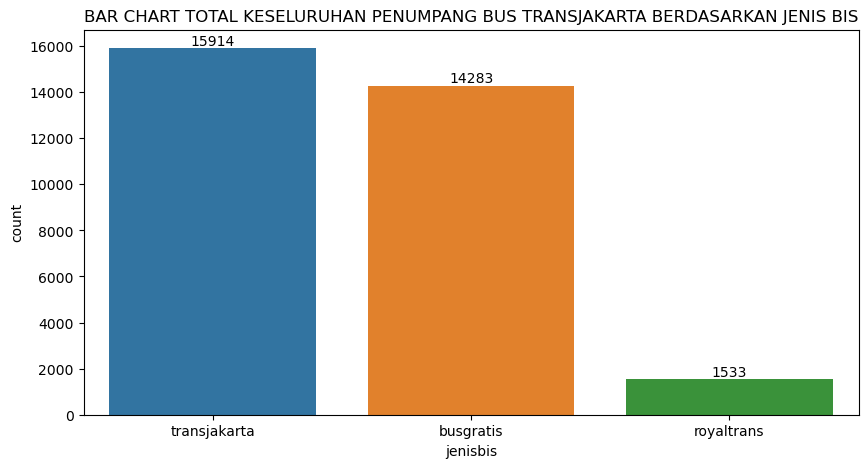

In [95]:
# Menyesuaikan ukuran gambar
plt.rcParams["figure.figsize"] = (10, 5)

# Menggunakan seaborn untuk membuat bar plot
ax = sns.barplot(x='jenisbis', y='count', data=total)
ax.set_title('BAR CHART TOTAL KESELURUHAN PENUMPANG BUS TRANSJAKARTA BERDASARKAN JENIS BIS')

# Menambahkan label pada bar
for container in ax.containers:
    ax.bar_label(container)

# Menampilkan plot
plt.show()

diagram bar chart diatas menunjukan jumlah penumpang bis `transjakarta` memiliki proposional jumlah yang sangat besar`15914` penumpang dibandingkan dengan dua jenis bis lainnya. sedangkan `royaltrans` memiliki jumlah total yang sangat sedikit dimana memiliki total sebanyak `1533` penumpang, variabel `busgratis` memiliki total sebanyak `14283` penumpang dalam waktu 1 bulan.

#### Apakah generasi kelompok usia bisa mempengaruhi seseorang dalam menggunakan jenis transportasi Transjakarta?

penjelasannya adalah mencari seberapa pengaruh jenis transportasi yang diapakai konsumen berdasarkan generasi. jadi langkah pertamanya adalah mencari hubungan antara kelompok usia (data kategorikal) dengan berdasarkan jenis transportasi (data kategorikal). kemudian menghitung seberapa banyak generasi yang menggunakan transportasi Transjakarta dengan membaginya berdasarkan jenis bus. 

In [28]:
nomor1 = df[['paycardbirthdate','payamount', 'jenisbis', 'generasi']]
nomor1

paycardbirthdate  payamount      jenisbis   generasi
0      2008              3500.0     transjakarta  gen z    
1      1997              3500.0     transjakarta  gen z    
2      1992              3500.0     transjakarta  millenial
3      1978              3500.0     transjakarta  gen x    
4      1982              3500.0     transjakarta  millenial
...     ...                 ...              ...        ...
37895  2004              3500.0     transjakarta  gen z    
37896  1974              3500.0     transjakarta  gen x    
37897  1976              20000.0    royaltrans    gen x    
37898  1976              0.0        busgratis     gen x    
37899  1985              3500.0     transjakarta  millenial

[31730 rows x 4 columns]

melakukan `groupby` pada kolom `generasi dan jenisbis` yang bertujuan untuk membuat `bar chart` pada kolom `generasi` dan juga `jenisbis` serta melakukan penghitungan seluruh jumlah penumpang yang  menggunakan bis transjakarta berdasarkan umur `generasi`. serta melakukan uji statistik pada data kategorikal dengan merubah bentuk data berdasarkan value count dengan `pivot_table`

In [29]:
gen_jenisval = nomor1.groupby(['generasi'], as_index=False)['jenisbis'].value_counts()
gen_jenisval

generasi      jenisbis  count
0   boomer 1   transjakarta  205  
1   boomer 1   busgratis     79   
2   boomer 1   royaltrans    2    
3   boomer 2   transjakarta  266  
4   boomer 2   busgratis     136  
5   boomer 2   royaltrans    1    
6   gen x      busgratis     2847 
7   gen x      transjakarta  2527 
8   gen x      royaltrans    87   
9   gen z      transjakarta  5568 
10  gen z      busgratis     4111 
11  gen z      royaltrans    476  
12  millenial  transjakarta  7348 
13  millenial  busgratis     7110 
14  millenial  royaltrans    967

In [30]:
pivotno1= pd.pivot_table(gen_jenisval, values='count', index= ['generasi'], columns= ['jenisbis'])
pivotno1

jenisbis   busgratis  royaltrans  transjakarta
generasi                                      
boomer 1   79         2           205         
boomer 2   136        1           266         
gen x      2847       87          2527        
gen z      4111       476         5568        
millenial  7110       967         7348

#### uji hipotesis dengan `Chi-Squared Test for Independence between Two Categorical Variables`
uji ini berfungsi untuk melihat data dua atau lebih data kategorikal yang memiliki hubungan antar variabelnya.

##### Hypothesis:

Ho : kedua variabel tersebut tidak berhubungan <br>
Ha : kedua variabel tersebut berhubungan

In [31]:
from scipy.stats import chi2_contingency

# MENDEFINISIKAN kolom `jenisbis` DENGAN KOLOM `jenisbis`
data = [[79, 2, 205], [136, 1, 266],[2847, 87, 2527],[4111, 476, 5568],[7110, 967, 7348]]
stat, pvalue, dof, expected = chi2_contingency(data)

# Conclusion
alpha = 0.05
print('p value:', pvalue)
if pvalue <= alpha:
    print('Dependent (tolak H0)')
else:
    print('Independent (terima H0)')

p value: 5.816776693917933e-99
Dependent (tolak H0)


hasil dari dari metode pengujian diatas menilai bahwasanya kedua variabel tersebut memiliki `p-value` sebesar `5.816776693917933e-99` yang mana nilai tersebut lebih kecil nilai `alpha` yang sebesar `0.05`. arti dari penilaian tersebut adalah bahwasanya `kedua variabel data tersebut memiliki hubungan secara positive namun sangatlah kecil antar variabel`. dimana variabel dari umur seseorang bisa mempengaruhi dalam memilih jenis bis transjakarta. <br>
untuk itu selanjutnya adalah melihat visualisasi.

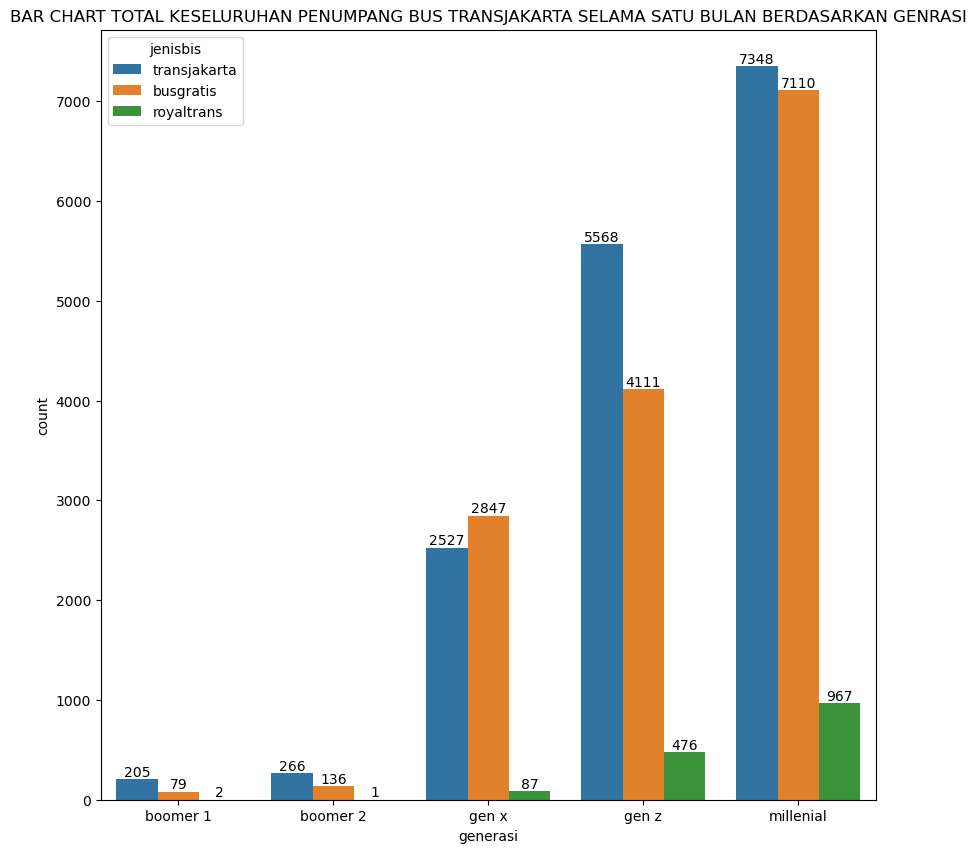

In [32]:
# Menyesuaikan ukuran gambar
plt.rcParams["figure.figsize"] = (10, 10)

# Menggunakan seaborn untuk membuat bar plot
ax = sns.barplot(x='generasi', y='count', data=gen_jenisval, hue='jenisbis')
ax.set_title('BAR CHART TOTAL KESELURUHAN PENUMPANG BUS TRANSJAKARTA SELAMA SATU BULAN BERDASARKAN GENRASI')

# Menambahkan label pada bar
for container in ax.containers:
    ax.bar_label(container)

# Menampilkan plot
plt.show()

bar chart diatas menampilkan bahwasannya bis dengan kategori `transjakarta` memikiki jumlah penumpang yang paling besar dibandingkan dengan bis `bisgratis`, walaupun pada generasi `gen x` bis `transjakarta` memiliki nilai lebih kecil dibandingkan bis `bisgratis`. terlebih lagi bis `royaltrans` memiliki tingkat ketipangan yang sangat jauh. hal ini disebebkan beberapa faktor yang membuat bis `royaltrans` memiliki total penumpang yang sangat sedikit diantaranya adalah:<br>
1. `royaltrans` memiliki jumlah koridor yang sangat sedikit. dibandingkan dengan jenis bus lain<br>
2. bis ini merupakan bis esekutif dengan harga Rp. 20,000 yang mana kebanykan rutenya hanya untuk tujuan tempat pariwisata <br><br>

selanjutnya pada pembahasan table `generasi` ternyata banyak perbedaan antar generasi dalam memilih jenis bus, khususnya perbedaan yang sangat signifikan antara generasi `boomer 2` dengan generasi `gen x` yang sangat mencolok, begitu juga dengan variable lainnya. seperti kita ketahui hal ini terjadi dikarenakan saat ini ketiga generasi `gen x, gen z, millelinal` kebanyakan dari mereka sudah berkerja dan mengenyam pendidikan di jakarta dibandingkan dengan generasi `boomer 2, dan boomer 1` yang saat ini sudah memasuki masa pensiun, selanjutnya juga menurut data saat ini. <br><br>
kemudian pada generasi `gen x` jumlah penumpang yang menggunakan `bis gratis` ternyata tinggi dibanding dengan yang menggunakan `transjakarta`. data dari generasi ini sangatlah berbeda dibandingkan data dari keempat generasi lainnya yang mana jumlah penumpang bus `transjakarta` lebih banyak dibandingkan dengan jumlah penumpang bus `bisgratis`. sebabnya adalah generasi `gen x` merupakan genrasi saat ini kebanyakan hidupnya serba minimalis dimana beban pengeluarannya serba sedikit (https://www.kompas.id/baca/gaya-hidup/2020/02/12/kaum-milenial-jakarta-cenderung-tak-mau-beli-mobil). <br><br>

kesimpulannya adalah dengan adanya pembagian kategori jenis bis transjakarta ini bisa berpengaruh pada seseorang dalam menentukan jenis bisnya berdasarkan genrasi.

### 2. Pada waktu jam berapa, hari apa saja, koridor mana dan jenis busway Transjakarta apa yang memiliki jumlah penumpang yang sangat tinggi dalam waktu 1 bulan? 

membuat data frame baru yang berisikan kolom-kolom: <br>`'tanggaltapin','tapintime','corridorname','tapinstopsname','tapinstopslat','tapinstopslon','tapoutstopsname','tapoutstopslat','tapoutstopslon', 'payamount', 'tanggaltapin','jamtapin', 'haritapin', 'jenisbis'`

In [33]:
nomor2 = df[['tanggaltapin','tapintime','corridorname','tapinstopsname','tapinstopslat','tapinstopslon','tapoutstopsname','tapoutstopslat','tapoutstopslon', 'payamount', 'tanggaltapin','jamtapin', 'haritapin', 'jenisbis']]


##### mencari hubungan antara variabel `jenisbis` dengan `jamtapin` serta mencari jam dengan penumpang bis transjakarta tertinggi 


In [34]:
jam=  nomor2.groupby(['jamtapin'], as_index=False)['jenisbis'].value_counts()

pivotnojam= pd.pivot_table(jam, values='count', index= ['jamtapin'], columns= ['jenisbis']).reset_index()
pivotnojam

jenisbis  jamtapin  busgratis  royaltrans  transjakarta
0         5         1189       82          1538        
1         6         2201       203         2462        
2         7         1076       133         1129        
3         8         1119       154         1124        
4         9         1064       152         1167        
5         10        115        10          131         
6         11        142        8           137         
7         12        121        15          144         
8         13        145        10          141         
9         14        74         9           65          
10        15        152        8           168         
11        16        1259       77          1486        
12        17        2003       208         2413        
13        18        927        108         985         
14        19        940        134         967         
15        20        916        121         991         
16        21        840        101         866

seperti kita ketahui bahwasanya variable `jamtapin` merupakan jenis tipe data kategorikal yang ber asosiasi numerikal. sebabnya adalah karena data jam tidak bisa dicari nilai median dan mean nya serta data tersebut tidak bisa dibagi. sehingga hipotesis yang cocok untuk mengukur hubungan dari kedua kategori dengan menggunakan `chi square`

In [35]:
data = [[1189,82,1538 ], [2201,203,2462],[1076,133,1129],[1119,154,1124],[1064,152,1167],[115,10,131],[142,8,137],[121,15,144],[145,10,141],[74,9,65],[152,8,168],[1259,77,1486],[2003,208,2413],[927,108,985],[940,134,967],[916,121,991],[840,101,866]]
stat, pvalue, dof, expected = chi2_contingency(data)

# Conclusion
alpha = 0.05
print('p value:', pvalue)
if pvalue <= alpha:
    print('Dependent (tolak H0)')
else:
    print('Independent (terima H0)')

p value: 4.558028832017598e-19
Dependent (tolak H0)


metode pengujian diatas menilai bahwasanya hubungan variabel `jamtapin` dengan variabel `jenis bis`  memiliki `p-value` sebesar `4.558028832017598e-19` yang mana nilai tersebut lebih kecil nilai `alpha` yang sebesar `0.05`. hasil dari nilai diatas variabel tersebut adalah `dependen` yang mana variabel dari kategorikal yang memiliki hubungan antar kategorikal tersebut sangatlah kecil. arti dari `dependent` tersebut ialah bahwasanya seseorang memilih bus transjakarta ada yang berdasarkan waktu walaupun hubungannya itu sangat kecil.

In [36]:
import plotly.express as px

fig = px.line(jam, x='jamtapin', y='count', color='jenisbis', markers=True, title= 'GRAFIK TOTAL PENUMPANG BIS TRANSJAKARTA BERDASARKAN DARI WAKTU (JAM)')
fig.show()

data diatas dapat disimpulkan bahwasannya penumpang bus transjakarta sangat banyak dan fluktuatif pada jam `6` pagi serta diikuti pada jam `5, 7,8, 9`, juga ketika di sore hari pada jam `5` dan dibawahnya ada jam `4, 6, 7, dan 8` seperti kita ketahui bahwasannya dijam tersebut merupakan jam kerja bagi karyawan jakarta, khususnya bagi penumpang bis `transjakarta, dan bisgratis`, ketika di jam `10 pagi - 3 sore` sangatlah sedikit penumpangnya bahkan selisih nya sangatlah jauh dibandingkan pada jam kerja karyawan.<br>
namun untuk jenis bis `royaltrans` ternyata memiliki kenaikan jumlah penumpangnya hampir sama dengan dua jenis bis lainya, dimana bis ini memiliki waktu sibuk juga pada jam-jam kerja dan sepi pada jam-jam istirahat siang.

##### mencari hari dengan penumpang bis transjakarta tertinggi 


In [56]:
nama = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hari=  nomor2.groupby(['haritapin'], as_index=False)['jenisbis'].value_counts()


df['haritapin'] = df['haritapin'].astype('category', categories=nama, ordered=True)
hari
pivotnojam= pd.pivot_table(hari, values='count', index= ['haritapin'], columns= ['jenisbis']).reset_index()
print(pivotnojam)


jenisbis  haritapin  busgratis  royaltrans  transjakarta
0         Friday     2573       281         2905        
1         Monday     2550       281         2861        
2         Saturday   700        61          777         
3         Sunday     730        66          756         
4         Thursday   2585       278         2863        
5         Tuesday    2589       283         2883        
6         Wednesday  2556       283         2869        


In [65]:
nama = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

hari=  nomor2.groupby(['haritapin'], as_index=False)['jenisbis'].value_counts()

pivotnojam= pd.pivot_table(hari, values='count', index= ['haritapin'], columns= ['jenisbis']).reset_index()

from pandas.api.types import CategoricalDtype
cat_dtype = CategoricalDtype(
    categories=nama, ordered=True)
pivotnojam['haritapin'] = pivotnojam['haritapin'].astype(cat_dtype)
pivotnojam

jenisbis  haritapin  busgratis  royaltrans  transjakarta
0         Monday     2550       281         2861        
1         Tuesday    2589       283         2883        
2         Wednesday  2556       283         2869        
3         Thursday   2585       278         2863        
4         Friday     2573       281         2905        
5         Saturday   700        61          777         
6         Sunday     730        66          756

##### MENCARI HUBUNGAN ANTARA `haritapin` DENGAN TOTAL PENUMPANG  `jenisbis` DENGAN MENGGUNAKAN HIPOTESIS `Chi-Squared Test for Independence between Two Categorical Variables`

##### Hypothesis:

Ho : kedua variabel tersebut tidak berhubungan <br>
Ha : kedua variabel tersebut berhubungan

In [38]:
data = [[2573,281,2905 ], [2550,281,2861],[700,61,777],[730,66,756],[2585,278,2863],[2589,283,2883 ],[2556,283,2869 ]]
stat, pvalue, dof, expected = chi2_contingency(data)

# Conclusion
alpha = 0.05
print('p value:', pvalue)
if pvalue <= alpha:
    print('Dependent (tolak H0)')
else:
    print('Independent (terima H0)')

p value: 0.8870067844092393
Independent (terima H0)


intinya adalah bahwasanya kolom `haritapin` dengan kolom `kolomjenisbis` tidak memiliki hubungan. hal ini ditandai bahwa jumlah hari tidak mempengaruhi seseorang untuk memilih jenis transportasi bis. yang artinya adalah seseorang ketika mau menaiki bis tidak terpaut oleh banyaknya hari. 

In [79]:
fig = px.line(pivotnojam, x='haritapin',y=['busgratis','royaltrans','transjakarta'], markers=True, title= 'GRAFIK TOTAL PENUMPANG BIS TRANSJAKARTA BERDASARKAN DARI WAKTU (HARI)')  #
# fig.update_xaxes(categoryorder='array', categoryarray= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday'])
fig.show()

pada data `haritapin` ini untuk pola grafik hampir sama dengan pola grafik pada data `jamtapin` diatas yang mana data `haritapin` ini juga memiliki fluktuasi hari dimana hari senin sampai hari jumat memiliki jumlah penumpang yang sanagat banyak dalam waktu satu bulan, namun pada hari sabtu dan minggu jumlah penumpangnya sangat sedikit sekali, sebab utama dari ketimpangan jumlah penumpang tersebut ialah dikarenakan pada hari sabtu minggu tersebut merupakan hari libur di setiap kantor-kantor di jakarta sedangkan hari senin sampai jumat merupakan hari kerja untuk karyawan di jakarta ini khusus pada bis `transjakarta dan bisgratis`. kemudian pada bis `royaltrans` hal serupa juga sama terjadi dengan dua jenis bis lainnya.

##### mencari koridor dengan penumpang bis transjakarta tertinggi 


unuk mencari jumlah penumpang berdasarkan koridor terbanyak di setiap jenis bus maka langkah yang harus di lakukan adalah membuat pembagian kelas-kelas pada kolom `jenisbis`. isi dari kolom `jenisbis` adalah `transjakarta, bisgratis, dan royaltrans` kemudian  salah satu isi kolom tersebut harus di jumlahkan dengan menggunakan `value_counts` dan `short_value` . kemudian hasil dari penghitungan tersebut diambil hanya 10 koridor terbanyak di setiap daftar kolom. hasil dari ketiga kolom tersebut digabung dengan menggunakan `concate`. selepas hasil dari penggabungan data tersebut barulah divisualisasikan dnegan menggunakan `Tree Maps`. sehingga kita bisa tau koridor mana saja yang jumlah penumpangnya banyak berdasarkan jenis bus yang dipakai penumpang.

In [40]:
transjakarta= nomor2[nomor2['jenisbis']=='transjakarta']
transjakartatop=  transjakarta.groupby(['corridorname'])['jenisbis'].value_counts().sort_values(ascending=False).reset_index()
transtop= transjakartatop.head(10)


In [41]:
bisgratis= nomor2[nomor2['jenisbis']=='busgratis']

bisgratistop=  bisgratis.groupby(['corridorname'])['jenisbis'].value_counts().sort_values(ascending=False).reset_index()
gratistop= bisgratistop.head(10)

In [42]:
royaltrans= nomor2[nomor2['jenisbis']=='royaltrans']

royaltranstop=  royaltrans.groupby(['corridorname'])['jenisbis'].value_counts().sort_values(ascending=False).reset_index()
royaltop= royaltranstop.head(10)

In [43]:
top10 = pd.concat([transtop,gratistop,royaltop])
top10.reset_index(inplace = True)
top10.head(50)

index                                 corridorname      jenisbis  count
0   0      Ciputat - CSW                                transjakarta  350  
1   1      Harmoni - Jakarta International Stadium      transjakarta  313  
2   2      Pulo Gadung - Monas                          transjakarta  311  
3   3      Kalideres - Bundaran HI via Veteran          transjakarta  299  
4   4      Kebayoran Lama - Tanah Abang                 transjakarta  291  
5   5      Pasar Minggu - Tanah Abang                   transjakarta  273  
6   6      Ragunan - Blok M via Kemang                  transjakarta  268  
7   7      Blok M - Kota                                transjakarta  268  
8   8      Kampung Melayu - Pulo Gebang via BKT         transjakarta  260  
9   9      Gondangdia - Senen                           transjakarta  247  
10  0      Kampung Rambutan - Pondok Gede               busgratis     305  
11  1      Rusun Pondok Bambu - Walikota Jakarta Timur  busgratis     297  
12  2      Rusun Rawa Bebek - Kodamar                   busgratis     283  
13  3      Kampung Rambutan - Pasar Rebo via Poncol     busgratis     270  
14  4      Kampung Melayu - Pondok Kelapa               busgratis     263  
15  5      Tanah Abang - Kebayoran Lama                 busgratis     259  
16  6      Pulo Gebang - Rorotan                        busgratis     250  
17  7      Terminal Tanah Merah - Pulo Gadung           busgratis     245  
18  8      Cilincing - Rorotan                          busgratis     235  
19  9      Kalideres - Puri Kembangan                   busgratis     230  
20  0      Cibubur - Balai Kota                         royaltrans    362  
21  1      Bekasi Barat - Kuningan                      royaltrans    201  
22  2      Palem Semi - Bundaran Senayan                royaltrans    162  
23  3      Cinere - Bundaran Senayan                    royaltrans    161  
24  4      Cibubur Junction - Blok M                    royaltrans    146  
25  5      Bintaro - Fatmawati                          royaltrans    136  
26  6      Bekasi Barat - Blok M                        royaltrans    117  
27  7      Cibubur - Kuningan                           royaltrans    88   
28  8      BSD Serpong - Fatmawati                      royaltrans    85   
29  9      Cinere - Kuningan                            royaltrans    75

#### membuat visualisasi diagram dengan menggunakan `TREE MAP`
yang bertujuan untuk melihat keseluruhan jumlah nilai data berdasarkan 3 atau lebih kategori

In [44]:
fig = px.treemap(top10, path=[px.Constant("TOTAL JUMLAH PENUMPANG JENIS BUS TRANSJAKARTA BERDASARKAN KORIDOR TERBANYAK"), 'jenisbis', 'corridorname'], values='count',
                  color='count',
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(top10['count'], weights=top10['count']))
fig.update_layout(margin = dict(t=20, l=5, r=10, b=10))
fig.show()

membuat visualisasi dengan menggunkakan `bar chart` pada variabel bis `transjakarta`

In [45]:
fig = px.bar(transtop, x="count", y="corridorname", orientation='h', title= '10 BESAR TOTAL PENUMPANG BIS "TRANSJAKARTA" BERDASARKAN DARI KORIDOR')
fig.update_traces(marker=dict(color='rgba(50, 171, 96, 0.6)', line=dict(color='rgba(50, 171, 96, 1.0)', width=1)))
fig.show()

In [46]:
fig = px.bar(gratistop, x="count", y="corridorname", orientation='h', title= '10 BESAR TOTAL PENUMPANG BIS "BISGRATIS" BERDASARKAN DARI KORIDOR')
fig.show()

In [47]:
fig = px.bar(royaltop, x="count", y="corridorname", orientation='h', title= '10 BESAR TOTAL PENUMPANG BIS "ROYALTRANS" BERDASARKAN DARI KORIDOR')
fig.update_traces(marker=dict(color='purple', line=dict(color='rgba(50, 171, 96, 1.0)', width=1)))
fig.show()

ada 1 anomali lonjakan penumpang jumlah yang sangat tinggi pada koridor `cibubur-balai kota` di bulan april ini. yang mana di jalur tersebut merupakan jalur ke tempat pariwisata dan bisnis seperti `cibubur junction`, `MH. Thamrin`, `plaza indonesia` dll. route ini juga merupakan route yang melewati tol tanpa berhenti (https://kumparan.com/jendela-dunia/informasi-rute-transjakarta-ke-cibubur-junction-1yibCkXgZFU/full) hal ini dapat dibuktikan dibawah. kemudian pada tanggal 19-25 april pada koridor tersebut ternyata ada libur lebaran dimana pada tanggal 23 hari minggu merupakan hari raya idul fitri.apakah dengan adanya libur idul fitri penumpang bus `royaltrans`bisa meningkat

In [48]:
Cibubur= df[df['corridorname']=='Cibubur - Balai Kota']


In [49]:
count = Cibubur['datetapin'].value_counts().reset_index()
count = count.rename(columns={'index': 'dateltapin'})
count = count.sort_values(by='datetapin')  # Sort by 'tanggaltapin' column

fig = px.line(count, x='datetapin', y='count', markers=True, title= 'TOTAL PENUMPANG BIS ROYALTRANS MUSIM LEBARAN DI KORIDOR Cibubur - Balai Kota')
fig.show()

disini saya ingin menlihat apakah musim libur lebaran bisa mempengaruhi banyaknya jumlah penumpang dalam menggunakan jasa transjakarta. tenyata data diatas menunjukan bahwasannya pada musim lebaran ternyata tidak berpengaruh pada banyaknya jumlah penumpang yang menggunakan bus `royaltrans` pada koridor `Cibubur - Balai Kota`. juga pada koridor ini difungsikan untuk bus khusus pariwisata. kemudian jarak antara halte bus cibubur ke jakarta melewati toll jagorawi. sehingga hal tersebut yang membuat koridor ini memiliki jumlah penumpang yang sangat banyak dibandingkan koridor lainnya bahkan juga dibandingkan jenis bis lainnya.

### 3. Apakah jenis pembayaran transaksi bisa mempengaruhi seseorang dalam memilih jenis bus yang dipakai?

In [50]:
nomor3 = df[['paycardbank','payamount', 'jenisbis', 'generasi']]
nomor3


paycardbank  payamount      jenisbis   generasi
0      emoney      3500.0     transjakarta  gen z    
1      dki         3500.0     transjakarta  gen z    
2      dki         3500.0     transjakarta  millenial
3      flazz       3500.0     transjakarta  gen x    
4      flazz       3500.0     transjakarta  millenial
...      ...          ...              ...        ...
37895  brizzi      3500.0     transjakarta  gen z    
37896  dki         3500.0     transjakarta  gen x    
37897  emoney      20000.0    royaltrans    gen x    
37898  emoney      0.0        busgratis     gen x    
37899  flazz       3500.0     transjakarta  millenial

[31730 rows x 4 columns]

membuat `groupby` dan `pivot table` pada kolom `paycardbank` dan `jenisbis`
yang berfungsi untuk menghitung seberapa banyak orang yang menggunakan jasa bus transjakarta berdasarkan jenis kartu transaksi, selain itu juga untuk melihat apakah jenis bus transjakarta memiliki hubungan dengan jenis kartu pembayaran dengan menggunakan hipotesis `Chi-Squared Test for Independence between Two Categorical Variables` dikarenakan kedua variabel tersebut merupakan data yang berisikan kategori.

In [51]:
kartu=  nomor3.groupby(['paycardbank'], as_index=False)['jenisbis'].value_counts()

pivotnokartu= pd.pivot_table(kartu, values='count', index= ['paycardbank'], columns= ['jenisbis']).reset_index()
pivotnokartu

jenisbis paycardbank  busgratis  royaltrans  transjakarta
0         bni         982        78          1202        
1         brizzi      1172       261         1489        
2         dki         7522       620         7560        
3         emoney      2430       361         3022        
4         flazz       995        105         1567        
5         online      1182       108         1074

`Chi-Squared Test for Independence between Two Categorical Variables` pada variabel `'paycardbank' dan 'jenisbis'`
 

##### Hypothesis:

Ho : kedua variabel tersebut tidak berhubungan <br>
Ha : kedua variabel tersebut berhubungan

In [52]:
data = [[982,78,1202 ], [1172,261,1489],[7522,620,7560],[2430,361,3022],[995,105,1567],[1182,108,1074]]
stat, pvalue, dof, expected = chi2_contingency(data)

# Conclusion
alpha = 0.05
print('p value:', pvalue)
if pvalue <= alpha:
    print('Dependent (tolak H0)')
else:
    print('Independent (terima H0)')

p value: 1.9988182593218703e-67
Dependent (tolak H0)


disini saya melihat bahwa variabel `paycardbank` dengan variable `jenisbis` berhubungan dengan sangat tidak signifikan. yang mana keputusan seseorang dalam menggunakan bus bisa dipengaruhi dengan kartu pembayaran yang dia gunakan. 

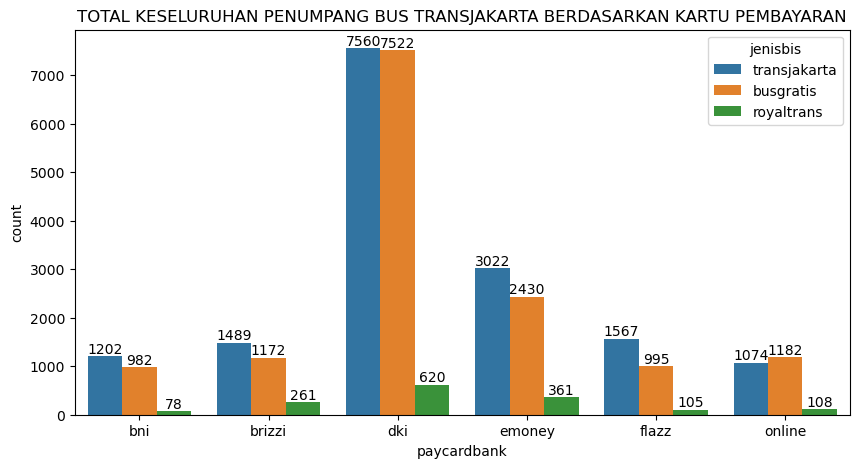

In [87]:
# Menyesuaikan ukuran gambar
plt.rcParams["figure.figsize"] = (10, 5)

# Menggunakan seaborn untuk membuat bar plot
ax = sns.barplot(x='paycardbank', y='count', data=kartu, hue='jenisbis')
ax.set_title('TOTAL KESELURUHAN PENUMPANG BUS TRANSJAKARTA BERDASARKAN KARTU PEMBAYARAN')

# Menambahkan label pada bar
for container in ax.containers:
    ax.bar_label(container)

# Menampilkan plot
plt.show()

diagram bar diatas berisikan bahwasanya kartu pembayaran kartu `dki` atau kartu jaklingko memiliki proporsri dengan total pengguna terbanyak dibandingkan dengan kartu pembayaran lainnya. hal ini disebabkan bahwasanaya orang memakai kartu transaksi jaklingko sering mendapatkan diskon potongan harga ketika naik transjakarta, bahkan juga ada promo gratis untuk naik angkot mikrolet. selain itu pada jam tertentu untuk pengguna kartu jaklingko juga sering diberi potongan 500-1,000 rupiah ketika di jam 9 keatas https://transjakarta.co.id/faq-jak-lingko/ <br>

## KESIMPULAN 
hasil dari kesimpulan diatas terkait minat sesorang dalam menggunakan bus transjakarta adalah:
* variabel `generasi` seseorang bisa mempengaruhi dalam menentukan jenis bus transjakarta. hal ini dibuktikan bahwa `gen x` memilih bus gratis dibandingkan bus transjakarta disebabkan gaya hidup minimalis pada generasi tersebut. <br>
* seseorang yang menggunakan jasa transportasi jakarta juga terpengaruh dari waktu keberangkatannya. dimana ketika jam kantor bus transjakarta sangat ramai, juga ketika *weekend* penumpang bus transjakarta sepi.<br>
* libur lebaran tidak berpengaruh pada banyaknya penumpang yang menggunakan `royaltrans`, khususnya pada koridor `Cibubur - Balai Kota`.<br>
* kartu pembayaran jaklingko `dki` seseorang penumpang bisa mendapatkan potongan harga, hal tersebut dibuktikan bahwa kartu jaklingko memiliki total pengguna terbanyak.<br>
* adanya perbedan jumlah penumpang banyak pada total penumpang bis `transjakarta, bisgratis`dibandingakn dengan bis `royaltrans`. dua bis tersebut memiliki jumlah penumpang yang sangat tinggi sebabnya adalah bis tersebut beroperasi pada koridor-koridor tempat kerja serta memiliki biaya layanan yang murah, sedangkan `royaltrans` beroperasi pada tempat wisata dengan harga mahal.



## REKOMENDASI
rekomendasi dari penulis untuk stakeholder adalah:

* menambah jenis bis baru untuk meningkatkan pendapatan sebab adanya ketimpangan harga dari ketiga jenis bis tersebut. atau membuat metode pembayaran yang bisa menarik penumpang untuk naik bis.
* membuka jalur koridor busway menuju tempat-tempat wisata dengan harga perjalanan yang relevan.
* membuat diskon besar-besaran pada hari-hari libur untuk menaikan jumlah penumpang, sebab pada saat ini jumlah penumpang pada hari libur sedikit.
* memberikan diskon kepada semua stakeholder pemilik kartu pembayaran sehingga penumpang tertarik untuk menggunkan transjakarta. 

kemudian rekomendasi penulis untuk data saat ini ialah:

* memperbanyak tentangan waktu data pada transjakarta, sebab rentangan data satu bulan tidak cukup untuk menganalisa prilaku konsumen dalam menggunakan bis transjakarta.

dari kesimpulan diatas diharapkan pihak manajemen PT. Transjakarta untuk lebih memberikan pengalaman dan pelayanan yang menyenangkan kepada penumpang sebab masih adanya peluang dalam meningkatkan jumlah pelanggan. 


In [54]:
df.to_excel(r'capstone nopal.xlsx', index=False)